In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [436]:
def select_network(network_num, chosen_data):

    data_ret = chosen_data[(chosen_data['PharmNetworkID'] == network_num)]

    groupcols = ['PharmNetworkName', 'SaleMonth']
    data_ret = data_ret.groupby(groupcols)[['Sale20']].sum()
    data_ret = data_ret.reset_index()

    phname = network_id[network_id['PharmNetworkID'] ==network_num]
    phname_ret = phname.iloc[0]['PharmNetworkName']

    label_ret = 'Аптечная сеть: '

    #dates_ret = sorted(chosen_data['SaleMonth'].unique())
    return data_ret, phname_ret, label_ret

In [437]:
def build_graph(data123, label1, name1):
    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    data123['Sale20'].plot(label=name1)

    plt.xlabel('dates', fontsize=14)
    ax = plt.gca()
    plt.xticks(np.arange(0, len(dates), 1.0))
    ax.set_xticklabels(data123['SaleMonth'], fontsize=12, rotation=30)
    plt.tight_layout()

    plt.ylabel('Продажи')
    plt.xlabel('Месяц')
    plt.title(label1 + name1, fontsize=24)
    plt.savefig(name1 +'.png', dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

In [438]:
def select_region(region_num, dataregions):

    na_reg = dataregions[dataregions['RegionYandexNameL3ID'] == region_num]
    name_reg_ret = na_reg.iloc[0]['RegionYandexNameL3']

    label_reg_ret = 'Регион: '


    data_reg_ret = dataregions[(dataregions['RegionYandexNameL3ID'] == region_num)]

    groupcols2 = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth']
    data_reg_ret = data_reg_ret.groupby(groupcols2)[['Sale20']].sum()
    data_reg_ret = data_reg_ret.reset_index()

    dates = sorted(data2['SaleMonth'].unique())
    
    return data_reg_ret, name_reg_ret, label_reg_ret

-------Открытие и анализ файла---------

In [439]:
data = pd.read_excel('Sale_2018.xlsx', sheet_name='DrugstoreSale')

In [440]:
#print('У нас %s строк и %s колонок.'%data.shape)
#print('---')
#print(data.info())

In [441]:
#data.describe()

-------Часть продукции имеет двойной размер (ProductID - 2), поэтому
нужно добавить новый столбец в котором значения 2 будут переведены в 1------------

In [442]:
target_columns = ['PharmNetworkID', 'SaleYear', 'SaleMonth', 'ProductID', 'SaleQuantity']
data2 = data[target_columns]
data2['Sale20'] = data2['SaleQuantity']*data2['ProductID']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [443]:
data2.head()

,PharmNetworkID,SaleYear,SaleMonth,ProductID,SaleQuantity,Sale20
0,20,2018,1,1,48,48
1,20,2018,1,1,39,39
2,20,2018,1,1,44,44
3,20,2018,1,1,34,34
4,20,2018,1,1,61,61


------------Добавление названия аптечных сетей из словаря--------------

In [444]:
pharmnetworks = pd.read_excel('Dictionary.xlsx', sheet_name='Pharmnetworks')
data2 = data2.merge(pharmnetworks, left_on='PharmNetworkID', right_on='PharmNetworkID', how='left')
#data2.head()

cols = data2.columns.tolist()
#print(cols)

cols = cols[-1:] + cols[:-1]
#print(cols)

data2 = data2[cols]
#data2.head(5)

# Построение графика продаж за 2018 год для выбранной Аптечной Сети #

In [445]:
pharmid = 6

######

data_select, name1, label1 = select_network(pharmid, data2)
data_select

,PharmNetworkName,SaleMonth,Sale20
0,Аптеки Солнышко,1,972
1,Аптеки Солнышко,2,975
2,Аптеки Солнышко,3,1561
3,Аптеки Солнышко,4,1076
4,Аптеки Солнышко,5,835
5,Аптеки Солнышко,6,787
6,Аптеки Солнышко,7,389
7,Аптеки Солнышко,8,577
8,Аптеки Солнышко,9,1693
9,Аптеки Солнышко,10,1129


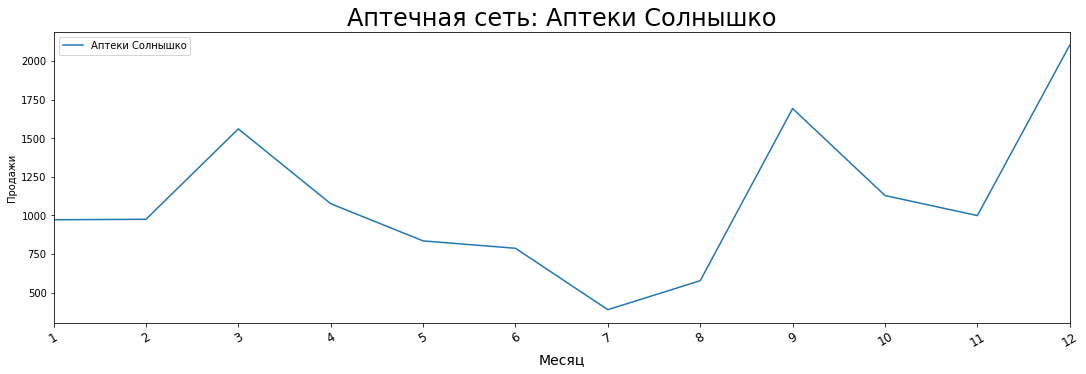

In [446]:
build_graph(data_select, label1, name1)

In [447]:
drugstores = pd.read_excel('Drugstores.xlsx', sheet_name='DrugstoreListFN')

In [448]:
#print('У нас %s строк и %s колонок.'%drugstores.shape)
#print('---')
#print(drugstores.info())

In [449]:
columns_drugstores = ['DrugstoreFNID', 'RegionYandexNameL3', 'RegionYandexNameL3ID']
drugstores_region = drugstores[columns_drugstores]
#print(drugstores_region.head(10))

target_columns2 = ['DrugstoreFNID', 'SaleMonth', 'ProductID', 'SaleQuantity']
data_region = data[target_columns2]
#data_region.head()
#data_region.info()
data_region = data_region.fillna(0)
data_region['DrugstoreFNID'] = data_region['DrugstoreFNID'].astype('int')
#data_region.head()
data_region = data_region.merge(drugstores_region, left_on='DrugstoreFNID', right_on='DrugstoreFNID', how='left')
#print(data_region.head(5))

data_region = data_region.fillna(0)
data_region['RegionYandexNameL3ID'] = data_region['RegionYandexNameL3ID'].astype(int)
data_region['Sale20'] = data_region['SaleQuantity']*data_region['ProductID']
region_columns = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth', 'Sale20']
data_region2 = data_region[region_columns]
#data_region2.head()

# Построение графика для 1-го региона #

In [450]:
number_region = 10

#########################

data_reg_in, name_reg_in, label_reg_in = select_region(number_region, data_region2)
data_reg_in

,RegionYandexNameL3ID,RegionYandexNameL3,SaleMonth,Sale20
0,10,Республика Карелия,1,5823
1,10,Республика Карелия,2,7374
2,10,Республика Карелия,3,12219
3,10,Республика Карелия,4,8826
4,10,Республика Карелия,5,3417
5,10,Республика Карелия,6,2842
6,10,Республика Карелия,7,1977
7,10,Республика Карелия,8,2994
8,10,Республика Карелия,9,11569
9,10,Республика Карелия,10,6598


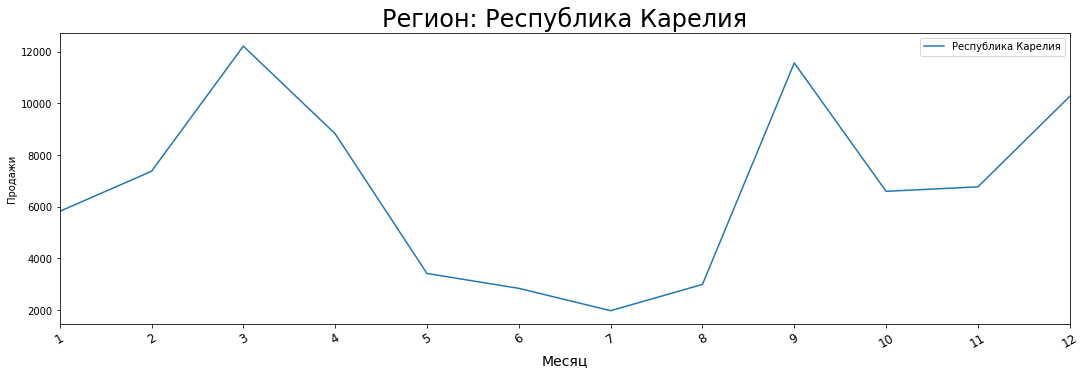

In [451]:
build_graph(data_reg_in, label_reg_in, name_reg_in)

# Построение графиков продаж для НЕСКОЛЬКИХ Аптечных Сетей #

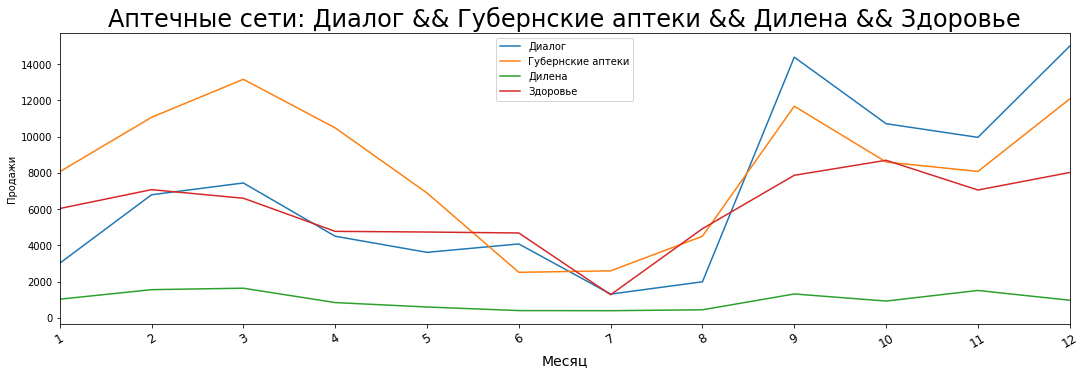

In [452]:
several_n = [37, 76, 132, 44]

#####################
qnames = []
fig, ax = plt.subplots(1, 1, figsize=(15,5))
for i in several_n:
    qdata, qname, qlabel = select_network(i, data2)
    qdata['Sale20'].plot(label=qname)
    qnames.append(qname)
    
re_label = 'Аптечные сети: '   

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(0, len(dates), 1.0))
ax.set_xticklabels(qdata['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('Продажи')
plt.xlabel('Месяц')

string_qname = ' && '.join(qnames)
    
plt.title(re_label + string_qname, fontsize=24)
plt.savefig(re_label + string_qname +'.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

# Построение графика для НЕСКОЛЬКИХ регионов #

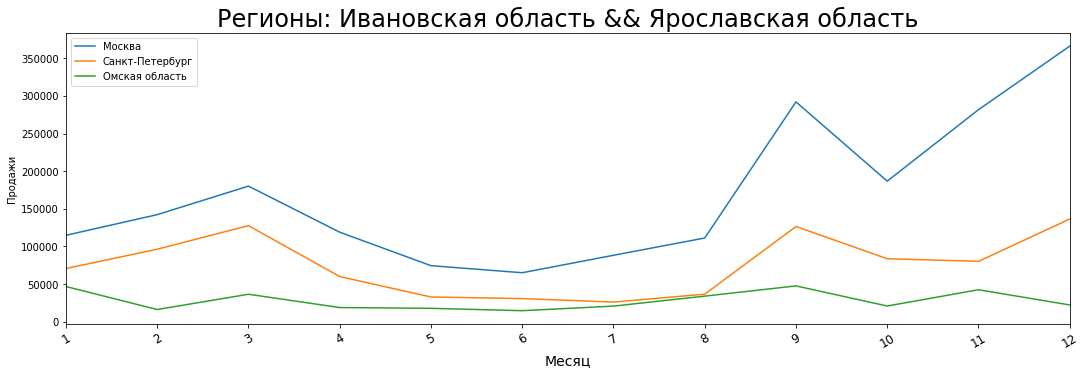

In [453]:
several_regions = [77, 78, 55]

#####################
qnames_r = []
fig, ax = plt.subplots(1, 1, figsize=(15,5))
for j in several_regions:
    qdata_r, qname_r, qlabel_r = select_region(j, data_region2)
    qdata_r['Sale20'].plot(label=qname_r)
    qnames_r.append(qname_r)
    
re_label_r = 'Регионы: '   

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(0, len(dates), 1.0))
ax.set_xticklabels(qdata_r['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('Продажи')
plt.xlabel('Месяц')

string_qname_r = ' && '.join(qnames_reg)
    
plt.title(re_label_r + string_qname_r, fontsize=24)
plt.savefig(re_label_r + string_qname_r +'.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

# Просмотр аптечных сетей #

In [462]:
network_cols = ['PharmNetworkName', 'PharmNetworkID']
network_id = data2[network_cols]
network_id = network_id.drop_duplicates()
network_id = network_id.sort_values(by=['PharmNetworkID'])
network_id = network_id.reset_index()
network_id = network_id[network_cols]

pd.options.display.max_rows = 150

network_id

,PharmNetworkName,PharmNetworkID
0,Ригла,1
1,Нео-Фарм,3
2,Фармаимпекс,4
3,Мега Фарм (Москва),5
4,Аптеки Солнышко,6
5,АПТЕКА-сити,7
6,Живика,8
7,Вита плюс,9
8,ИРИС,10
9,Мой доктор Томск,15


In [463]:
regions_cols = ['RegionYandexNameL3', 'RegionYandexNameL3ID']
regions_id = data_region2[regions_cols]
regions_id = regions_id.drop_duplicates()
regions_id = regions_id.sort_values(by=['RegionYandexNameL3ID'])
regions_id = regions_id.reset_index()
regions_id = regions_id[regions_cols]

regions_id

,RegionYandexNameL3,RegionYandexNameL3ID
0,0,0
1,Республика Адыгея,1
2,Республика Башкортостан,2
3,Республика Бурятия,3
4,Республика Алтай,4
5,Республика Дагестан,5
6,Кабардино-Балкарская Республика,7
7,Республика Калмыкия,8
8,Карачаево-Черкесская Республика,9
9,Республика Карелия,10
